# ⏳ install roboflow

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 93.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


# ⛪  path สำหรับไฟล์

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


# ⏳ install ultralytics

In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 40.9/107.7 GB disk)


# ⏳ load dataset model yolo11 from roboflow

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="NXX6BVw0vrRWctJa17WA")
project = rf.workspace("workformom").project("project_object_detection-dmq97")
version = project.version(2)
dataset = version.download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Project_Object_Detection-2 in yolov11:: 100%|██████████| 2348/2348 [00:00<00:00, 2967.94it/s]


# ✅ เช็ค path folder

In [ ]:
%cd {dataset.location}


/content/datasets/Project_Object_Detection-2


# ✍ custom training model for first time

In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=320 batch=4 plots=True patience=10 save_period=5 optimizer=Adam lr0=0.001 device=cpu save=True


100% 18.4M/18.4M [00:00<00:00, 106MB/s] 
New https://pypi.org/project/ultralytics/8.3.89 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/Project_Object_Detection-2/data.yaml, epochs=50, time=None, patience=10, batch=4, imgsz=320, save=True, save_period=5, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=

# ✍ เชื่อม google drive เพื่อบันทึกไฟล์ของ epoch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ✍ตรวจดูไฟล์ epoch

In [ ]:
!ls /content/drive/MyDrive/epoch/yolo_checkpoints/last.pt

/content/drive/MyDrive/epoch/yolo_checkpoints/last.pt


# ✍ custom training model continue

In [ ]:
!yolo task=detect mode=train model=/content/drive/MyDrive/epoch/yolo_checkpoints/last.pt resume=True


New https://pypi.org/project/ultralytics/8.3.90 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/epoch/yolo_checkpoints/last.pt, data=/content/datasets/Project_Object_Detection-2/data.yaml, epochs=50, time=None, patience=10, batch=4, imgsz=320, save=True, save_period=5, cache=False, device=cpu, workers=0, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=/content/drive/MyDrive/epoch/yolo_checkpoints/last.pt, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize

# ✍ save ไฟล์ drive เพื่อบันทุกไฟล์ epoch ล่าสุด

In [ ]:
!cp /content/datasets/Project_Object_Detection-2/runs/detect/train/weights/last.pt  /content/drive/MyDrive/epoch/yolo_checkpoints


In [ ]:
!ls  /content/datasets/Project_Object_Detection-2/runs/detect/train/


args.yaml					    P_curve.png		   val_batch1_labels.jpg
confusion_matrix_normalized.png			    PR_curve.png	   val_batch1_pred.jpg
confusion_matrix.png				    R_curve.png		   val_batch2_labels.jpg
events.out.tfevents.1741948155.99a406cf5735.3809.0  results.csv		   val_batch2_pred.jpg
F1_curve.png					    results.png		   weights
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg


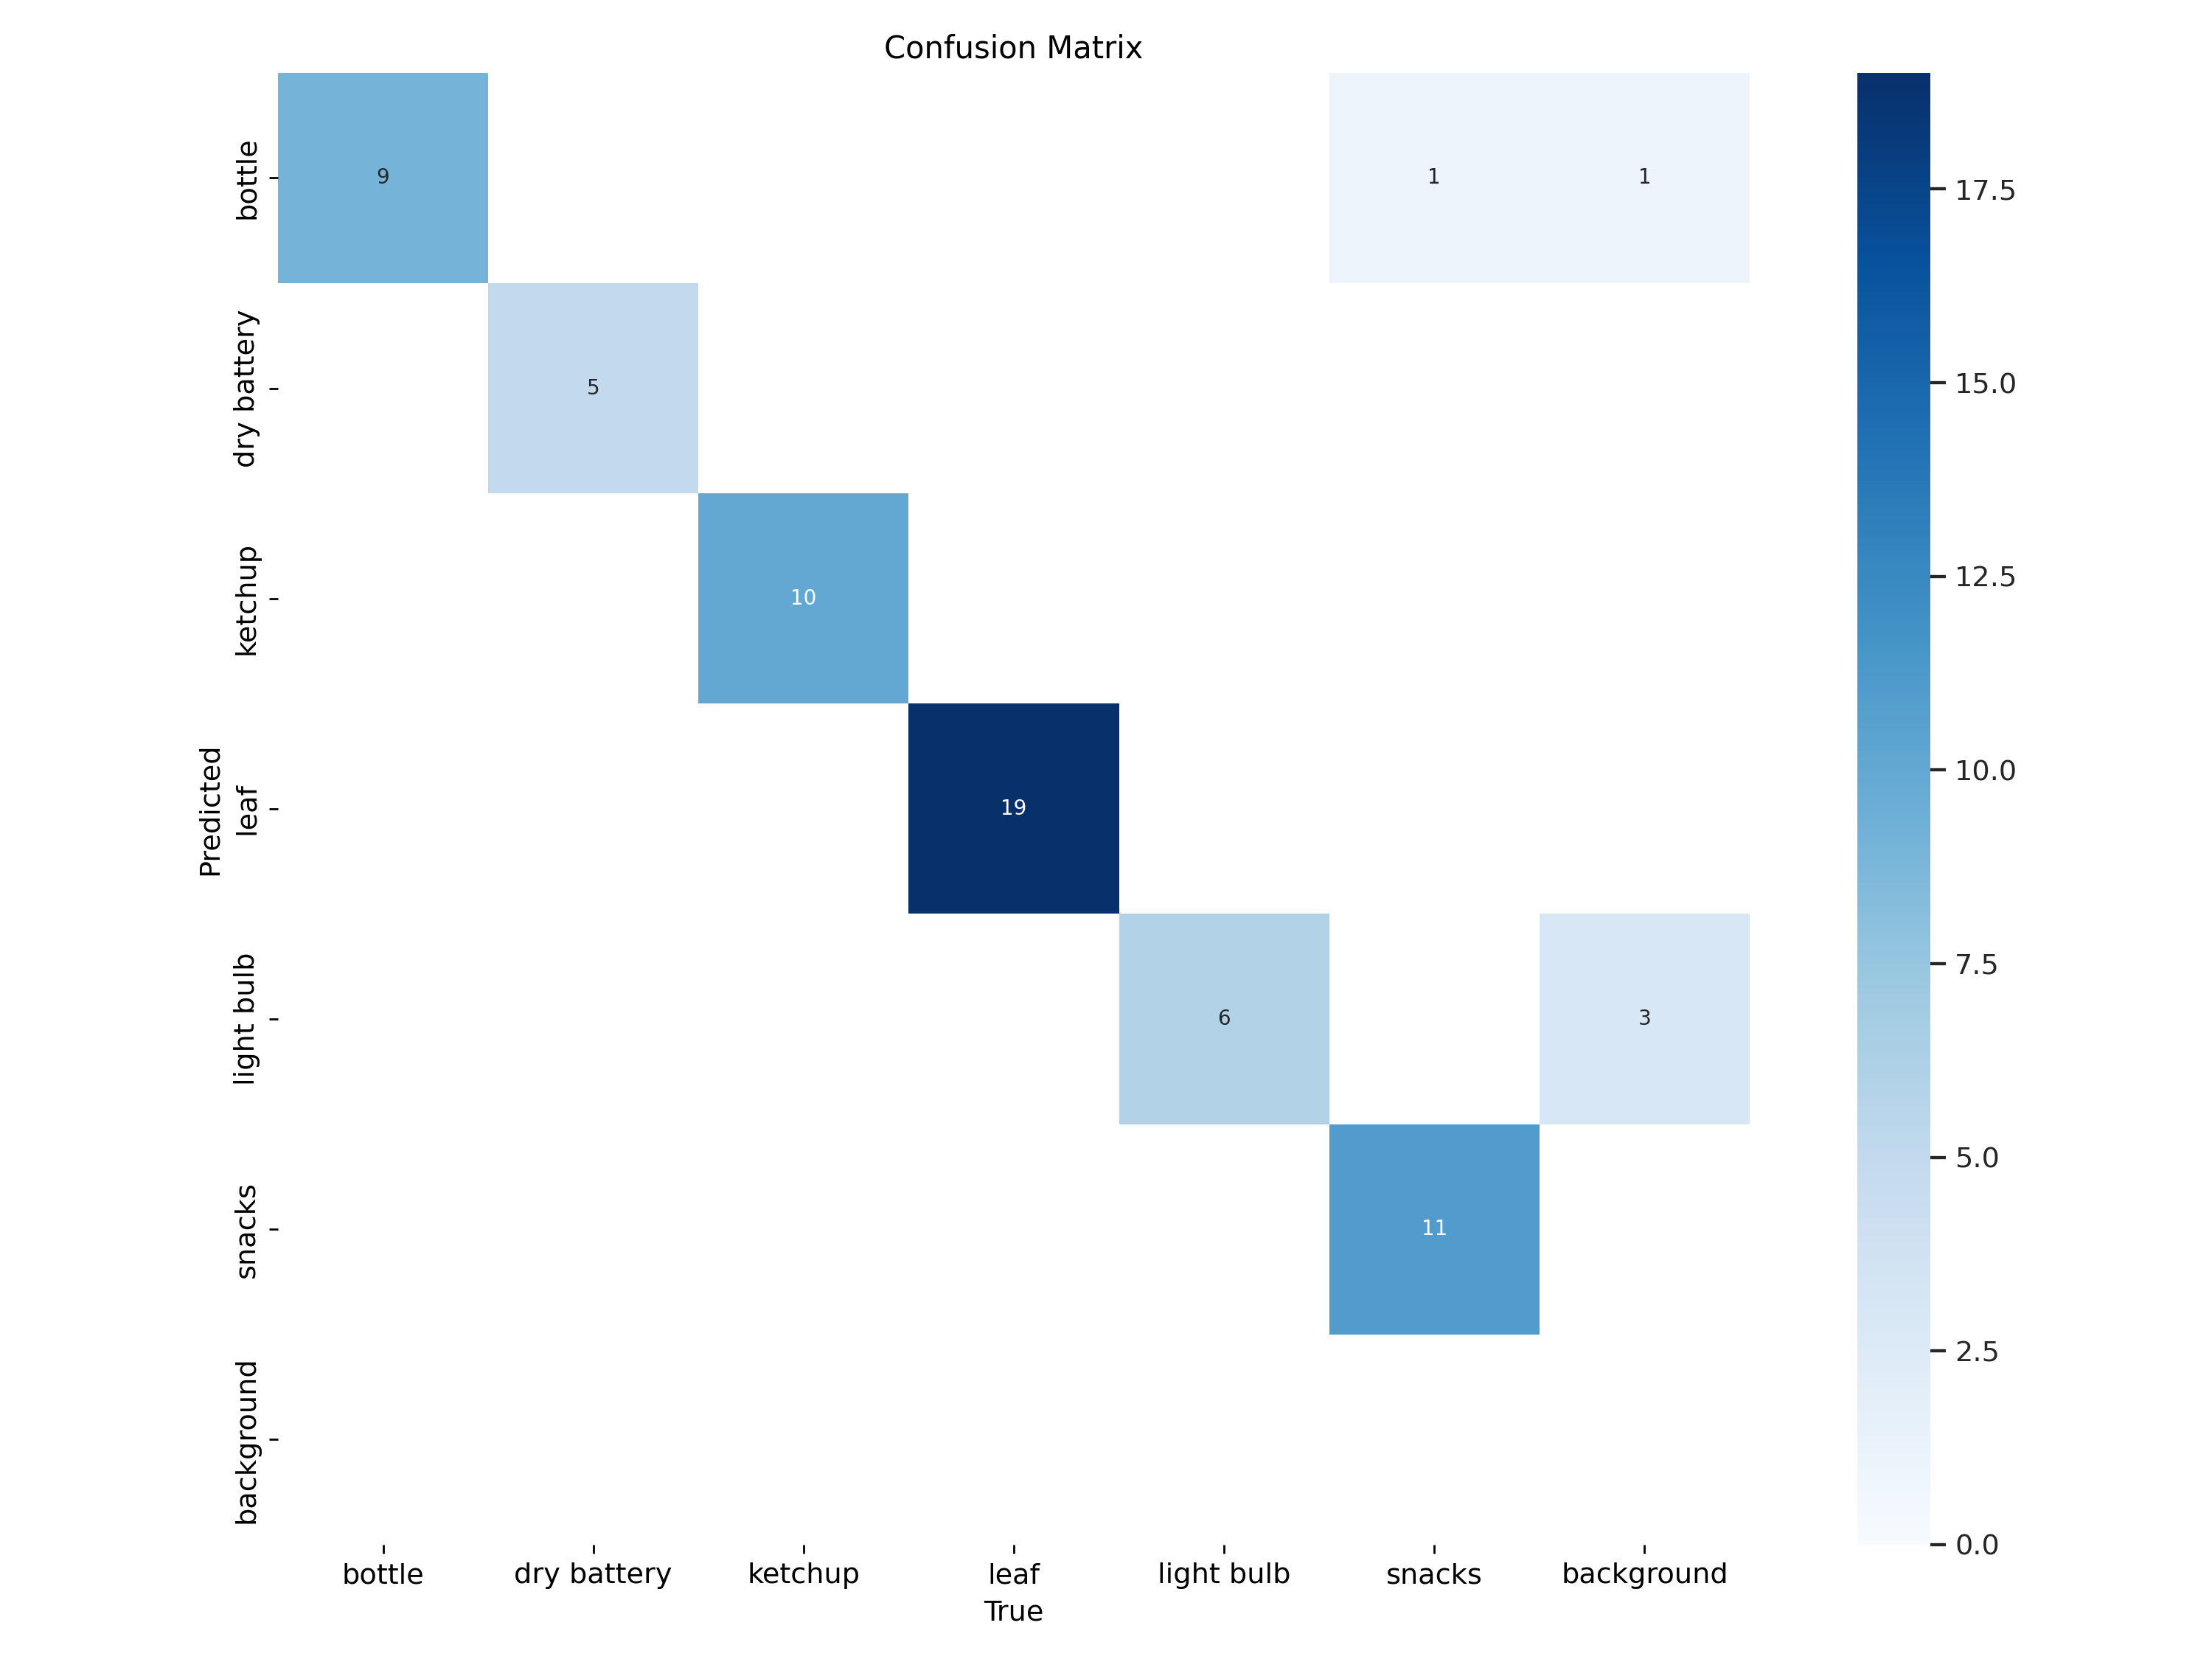

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/datasets/Project_Object_Detection-2/runs/detect/train/confusion_matrix.png', width=600)


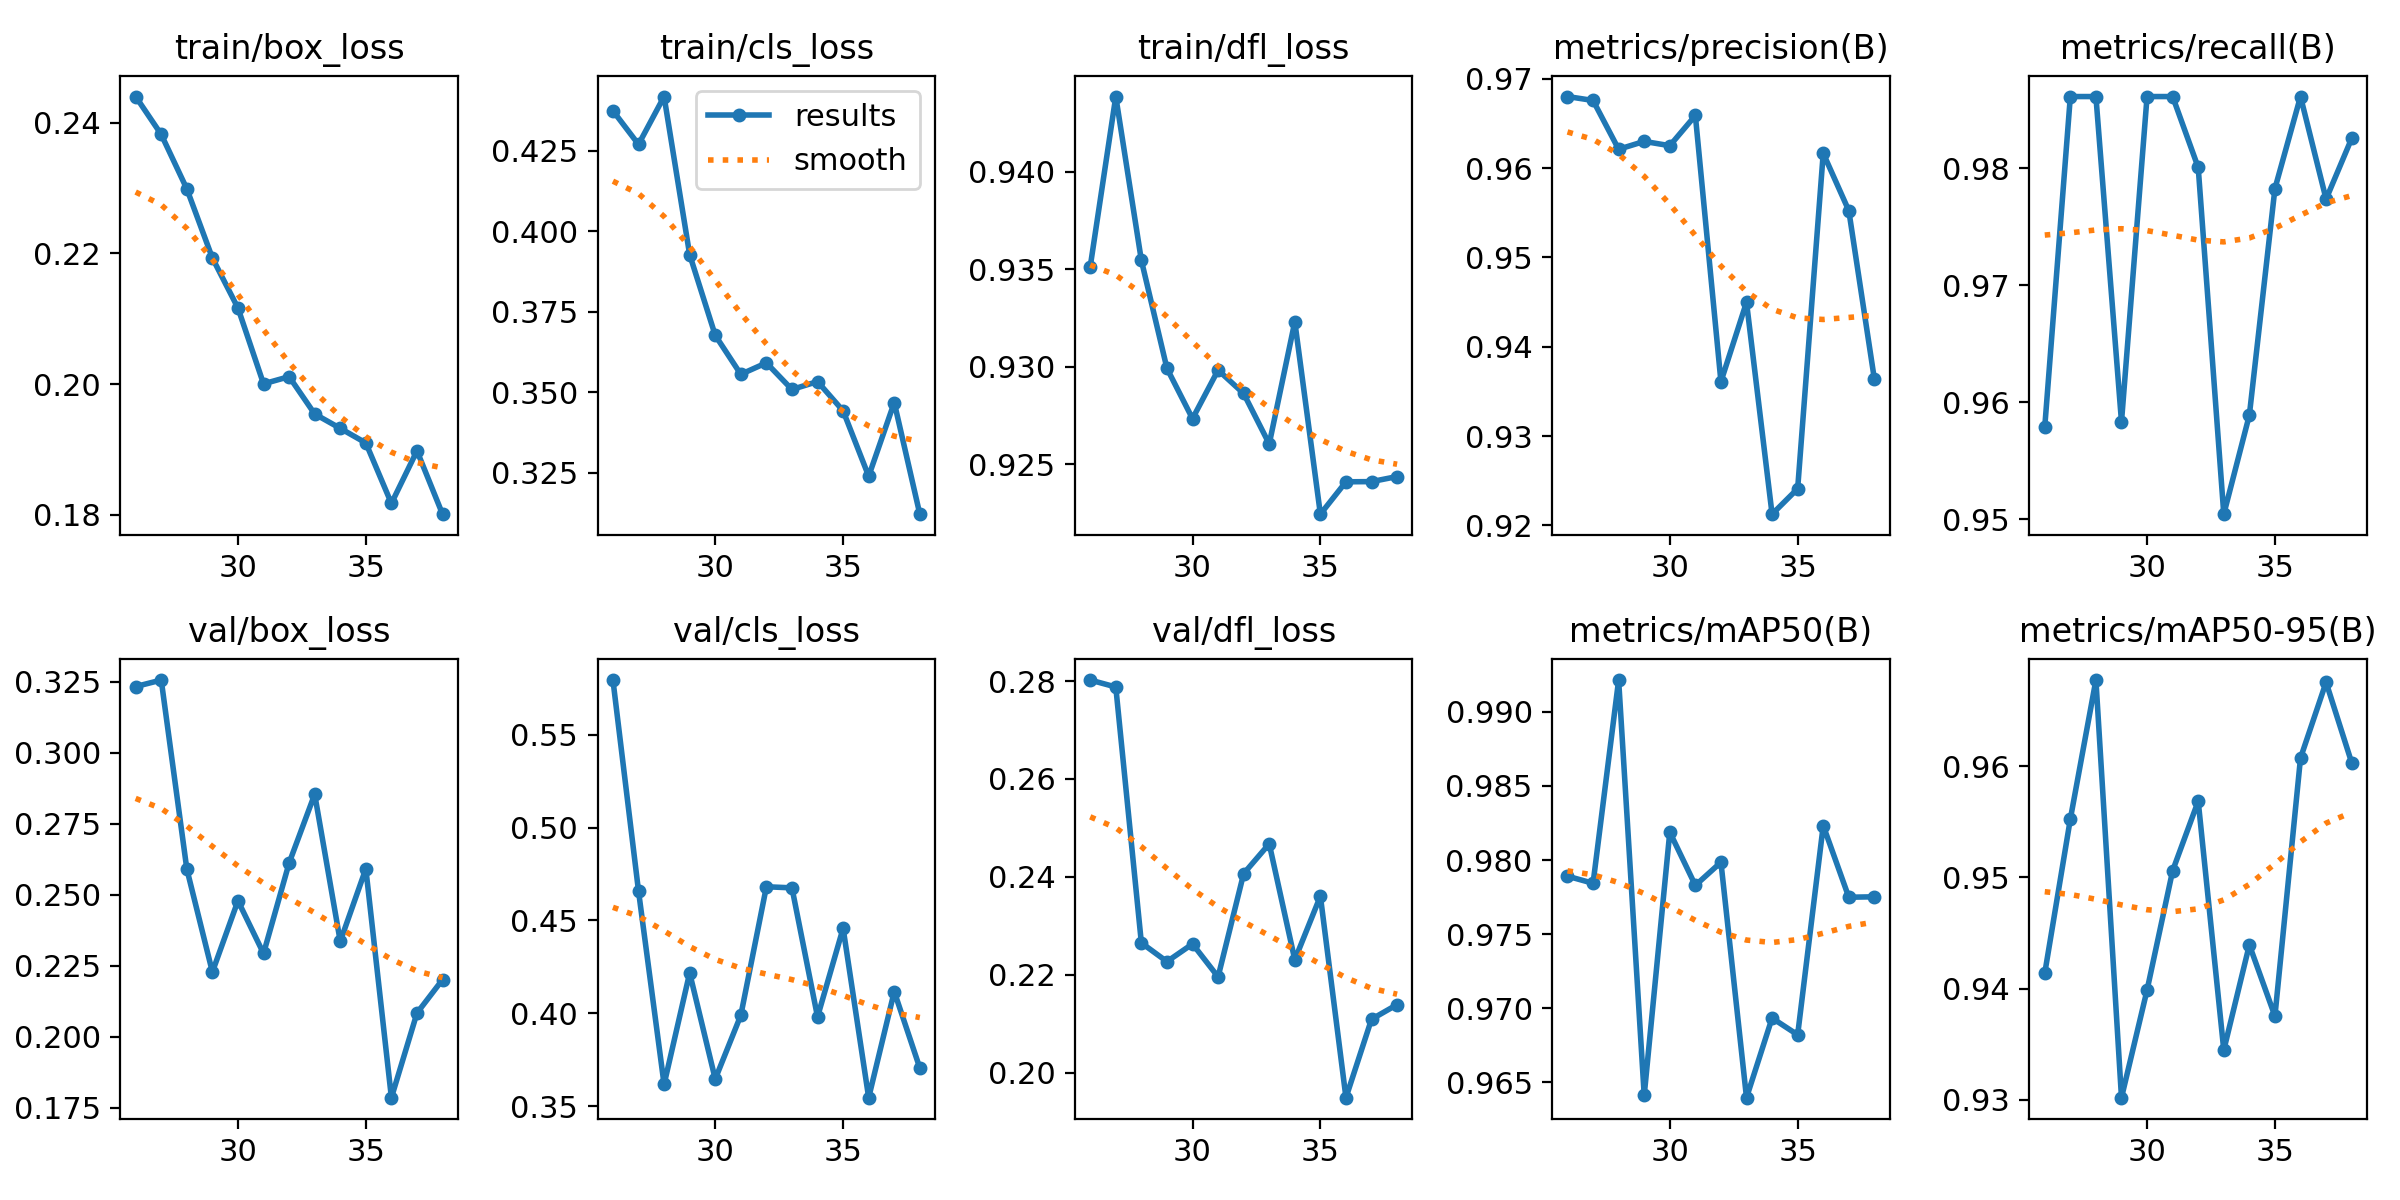

In [ ]:
from IPython.display import Image as IPyImage

IPyImage(filename='/content/datasets/Project_Object_Detection-2/runs/detect/train/results.png', width=600)


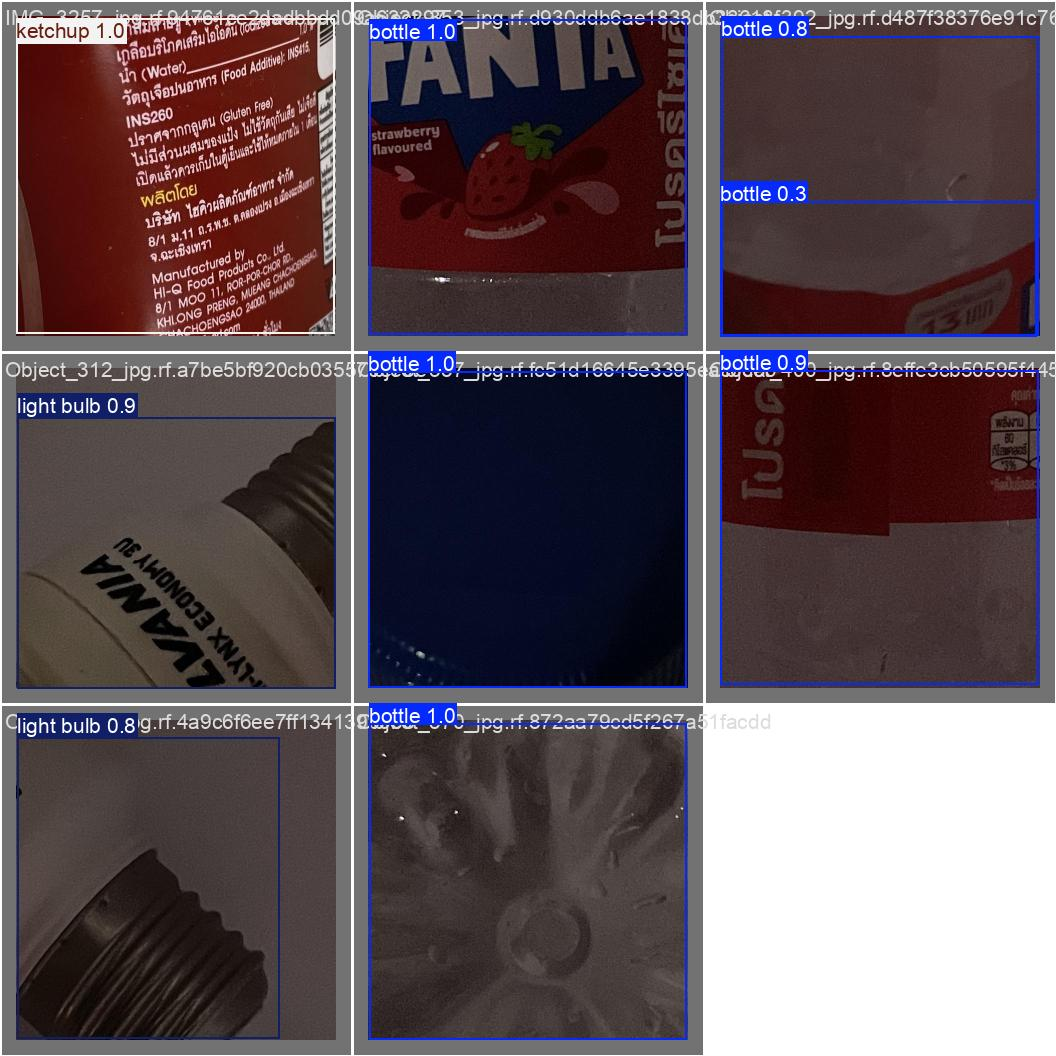

In [ ]:
from IPython.display import Image as IPyImage


IPyImage(filename='/content/datasets/Project_Object_Detection-2/runs/detect/train/val_batch0_pred.jpg', width=600)


#Validate fine-tuned model


In [ ]:
!ls /content/datasets/Project_Object_Detection-2/runs/detect/train/weights/



best.pt  epoch25.pt  epoch30.pt  epoch35.pt  last.pt


In [ ]:
#โมเดลที่ดีที่สุด
!yolo task=detect mode=val model=/content/datasets/Project_Object_Detection-2/runs/detect/train/weights/best.pt data=/content/datasets/Project_Object_Detection-2/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Project_Object_Detection-2/valid/labels.cache... 65 images, 4 backgrounds, 0 corrupt: 100% 65/65 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 61. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:20<00:00,  4.05s/it]
                   all         65         61      0.962      0.986      0.992      0.968
                bottle          9          9      0.885          1      0.984      0.975
           dry battery          5          5      0.965          1      0.995      0.924
               ketchup        

In [ ]:
#โมเดลล่าสุด
!yolo task=detect mode=val model=/content/datasets/Project_Object_Detection-2/runs/detect/train/weights/last.pt data=/content/datasets/Project_Object_Detection-2/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Project_Object_Detection-2/valid/labels.cache... 65 images, 4 backgrounds, 0 corrupt: 100% 65/65 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 61. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:15<00:00,  3.04s/it]
                   all         65         61      0.936      0.982      0.978       0.96
                bottle          9          9      0.876          1      0.929      0.929
           dry battery          5          5      0.948          1      0.995      0.948
               ketchup        

In [ ]:
#โมเดลจาก Epoch 25
!yolo task=detect mode=val model=/content/datasets/Project_Object_Detection-2/runs/detect/train/weights/epoch25.pt data=/content/datasets/Project_Object_Detection-2/data.yaml


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/Project_Object_Detection-2/valid/labels.cache... 65 images, 4 backgrounds, 0 corrupt: 100% 65/65 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 60, len(boxes) = 61. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:15<00:00,  3.04s/it]
                   all         65         61      0.968      0.958      0.979      0.941
                bottle          9          9      0.884          1      0.962      0.932
           dry battery          5          5      0.963          1      0.995      0.971
               ketchup        

#Inference with custom model

In [ ]:
!yolo task=detect mode=predict model=/content/datasets/Project_Object_Detection-2/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Project_Object_Detection-2/test/images save=True


Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,415,122 parameters, 0 gradients, 21.3 GFLOPs

image 1/65 /content/datasets/Project_Object_Detection-2/test/images/IMG_3236_jpg.rf.35d0e3c0378aa57524aaec1e34ff9a61.jpg: 320x320 1 ketchup, 170.6ms
image 2/65 /content/datasets/Project_Object_Detection-2/test/images/IMG_3237_jpg.rf.8f259babaa43ebb7fb8d13417de5d330.jpg: 320x320 1 ketchup, 166.3ms
image 3/65 /content/datasets/Project_Object_Detection-2/test/images/IMG_3249_jpg.rf.1d71c7249309b91145ffd2366c3ab12b.jpg: 320x320 1 ketchup, 160.3ms
image 4/65 /content/datasets/Project_Object_Detection-2/test/images/IMG_3251_jpg.rf.35ea225ef9a4c48d7713e7e62b783e7e.jpg: 320x320 1 ketchup, 160.2ms
image 5/65 /content/datasets/Project_Object_Detection-2/test/images/IMG_3252_jpg.rf.d58ff76cc2e1757317d93d23063e0118.jpg: 320x320 1 ketchup, 156.0ms
image 6/65 /content/datasets/Project_Object_Detection-2/test/images/IMG_3262_jpg.rf.01f35b8

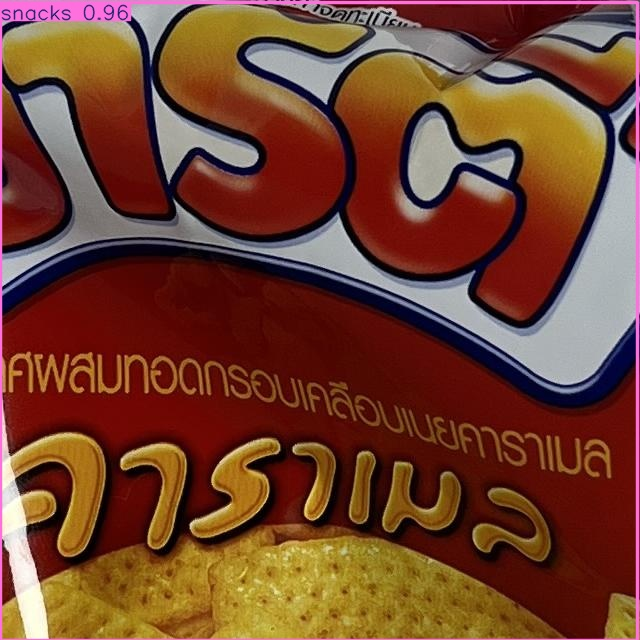

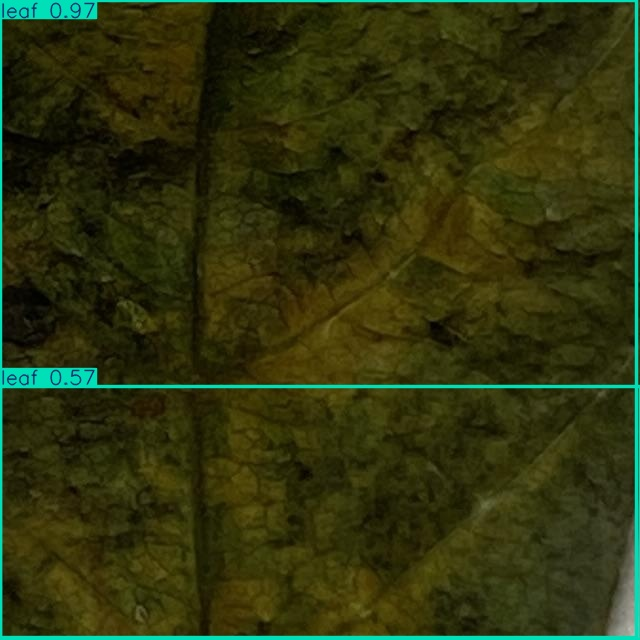

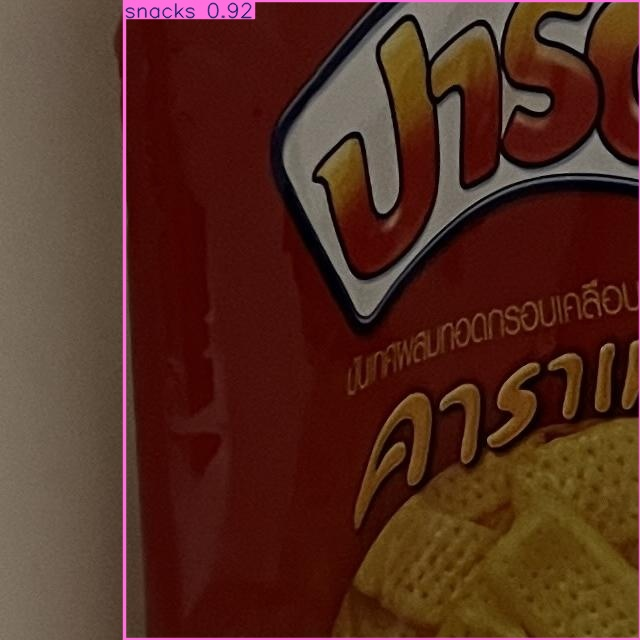

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

# ระบุเส้นทางโฟลเดอร์ล่าสุดจากการทำนาย
latest_folder = max(glob.glob('/content/datasets/Project_Object_Detection-2/runs/detect/predict*/'), key=os.path.getmtime)

# แสดงผลรูปภาพจากโฟลเดอร์ล่าสุด
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")


#Download dataset

In [54]:
from google.colab import files
files.download('/content/datasets/Project_Object_Detection-2/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>